# 고객 대출등급 분류 

### 1. 고객 관련 금융정보와 대출등급간의 상관관계 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False 
plt.rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
df = pd.read_csv('open/train.csv')
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


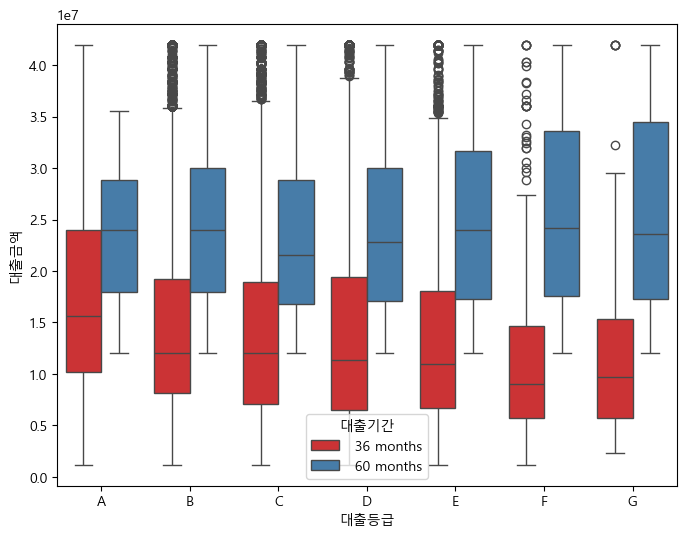

In [3]:
plt.figure(figsize=(8, 6))
order = ["A", "B", "C", "D", "E", 'F', 'G'] 
sns.boxplot(x="대출등급", y="대출금액", data=df, hue="대출기간", palette="Set1", order=order)# 박스그래프 생성
    ## hue: 카테고리 데이터 표현(2개이상 데이터 한번에 표현)  / Set 1 ~ 3: 스타일(색상) 변경

plt.show()   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


Text(0, 0.5, '고객 수(명)')

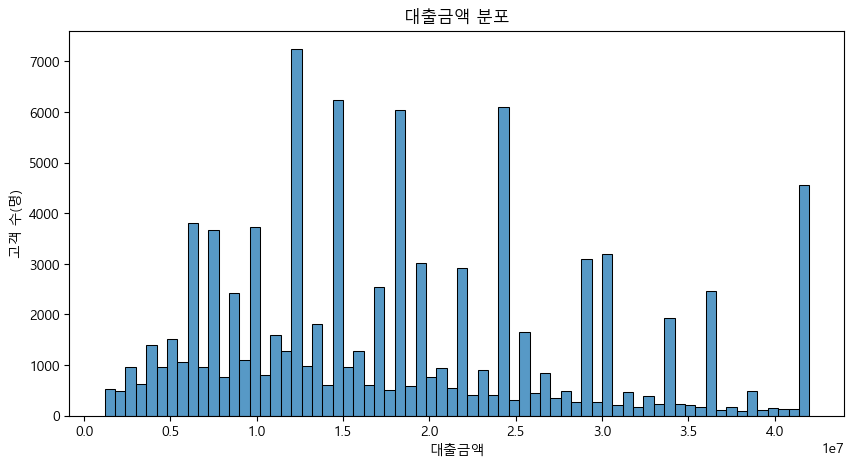

In [9]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=df['대출금액'])
plt.title('대출금액 분포')
plt.xlabel('대출금액')
plt.ylabel('고객 수(명)')

Text(0, 0.5, '고객 수(명)')

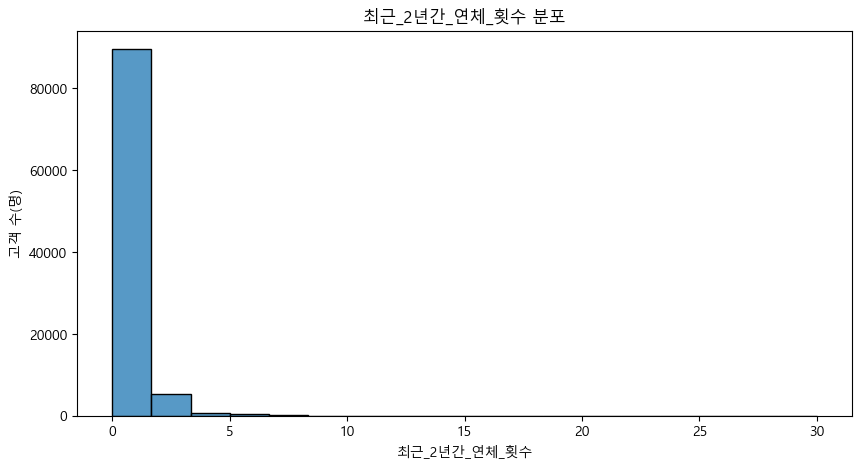

In [17]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=df['최근_2년간_연체_횟수'])
plt.title('최근_2년간_연체_횟수 분포')
plt.xlabel('최근_2년간_연체_횟수')
plt.ylabel('고객 수(명)')

In [15]:
df_group = df.groupby(['최근_2년간_연체_횟수']).size().reset_index()
df_group

,대출등급,대출기간,0
0,A,36 months,15952
1,A,60 months,820
2,B,36 months,22883
3,B,60 months,5934
4,C,36 months,16935
5,C,60 months,10688
6,D,36 months,6485
7,D,60 months,6869
8,E,36 months,1895
9,E,60 months,5459


NameError: name 'print_unique_values' is not defined

In [23]:

df['대출등급', '최근_2년간_연체_횟수'].value_counts()

KeyError: ('대출등급', '최근_2년간_연체_횟수')

### 2. 고객 대출등급 분류 프로그램 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 데이터 불러오기 및 전처리
data =  pd.read_csv('open/train.csv')
# 데이터 전처리 코드 추가 (null 값 처리, 범주형 변수 처리 등)

# 특성 변수 선택
features = data.drop('대출등급', axis=1)
target = data['대출등급']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))